In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
data_2009 = pd.read_csv("data/2009_grouped.csv")
data_2009.head()

,month,day_of_week,airline,origin,dest,num_of_flights,avg_delay
0,1,0,9E,ABE,DTW,8,3.875000
1,1,0,9E,ATL,AUS,7,-2.571429
2,1,0,9E,ATL,BHM,1,35.000000
3,1,0,9E,ATL,BNA,6,-4.833333
4,1,0,9E,ATL,BUF,4,7.750000


In [9]:
G_2009 = nx.from_pandas_edgelist(data_2009, source='origin', target='dest', edge_attr=['num_of_flights', 'avg_delay'], create_using=nx.DiGraph)

MAP

In [213]:
def viz_map(flights, year):
    airports_us = pd.read_csv("data/airports_us.csv")
    plt.figure(figsize = (10,9))
    m = Basemap(
            projection='merc',
            llcrnrlon=-180,
            llcrnrlat=10,
            urcrnrlon=-50,
            urcrnrlat=70,
            lat_ts=0,
            resolution='l',
            suppress_ticks=True)
    mx, my = m(airports_us['longitude'].values, airports_us['latitude'].values)
    pos = {}
    for count, elem in enumerate (airports_us['airport']):
        pos[elem] = (mx[count], my[count])

    
    temp = flights.groupby(["origin", "dest"]).sum().reset_index()
    counts = pd.DataFrame(temp.origin.value_counts())
    counts.columns=["total_flight"]
    G_2009 = nx.from_pandas_edgelist(temp, source='origin', target='dest', edge_attr=['num_of_flights'], create_using=nx.DiGraph)
    plt.figure(figsize=(15,20))
    nx.draw_networkx_nodes(G = G_2009, pos = pos, nodelist = [x for x in G_2009.nodes() if counts['total_flight'][x] >= 100],
                                node_color = 'r', alpha = 0.8,
                                node_size = [counts['total_flight'][x]*4  for x in G_2009.nodes() if counts['total_flight'][x] >= 100])

    nx.draw_networkx_labels(G = G_2009, pos = pos, font_size=10,
                            labels = {x:x for x in G_2009.nodes() if counts['total_flight'][x] >= 100})

    nx.draw_networkx_nodes(G = G_2009, pos = pos, nodelist = [x for x in G_2009.nodes() if counts['total_flight'][x] < 100],
                            node_color = 'b', alpha = 0.6,
                            node_size = [counts['total_flight'][x]*4  for x in G_2009.nodes() if counts['total_flight'][x] < 100])

    nx.draw_networkx_edges(G = G_2009, pos = pos, edge_color = 'g', width = temp['num_of_flights']*0.00081, 
                            alpha=0.1, arrows = False)

    m.drawcountries(linewidth = 3)
    m.drawstates(linewidth = 0.2)
    m.drawcoastlines(linewidth=1)
    m.fillcontinents(alpha = 0.3)
    line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
    line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
    line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
    plt.legend((line1, line2, line3), ('Large Airport >= 100 routes', 'Smaller airports', 'routes'))
    plt.title(f"Network graph of flight routes in the USA in {year}", fontsize = 30)
    plt.tight_layout()
    plt.savefig(f"./images/{year}.jpg", format = "jpg", dpi = 300)
    plt.show()


<Figure size 1000x900 with 0 Axes>

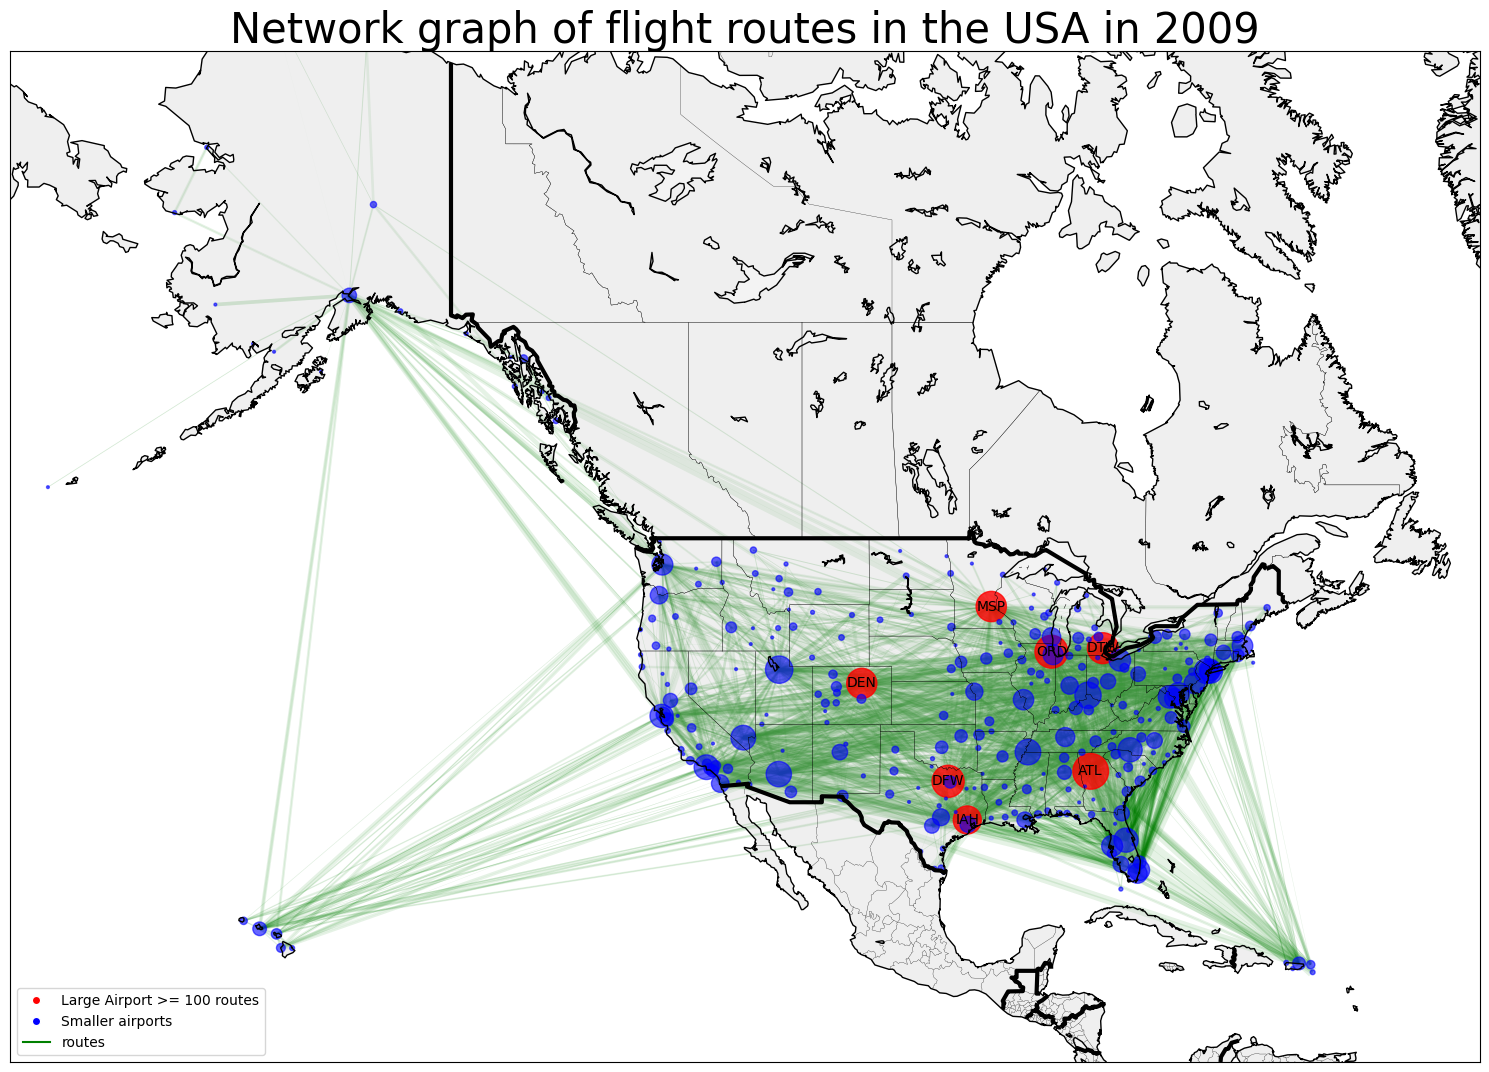

In [214]:
viz_map(data_2009, 2009)